### <b> Stock Price Predictor

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
s = input('Enter code of the stock : ')
d = yf.download(s,'2008-01-01','2022-01-01')
d.head()

Enter code of the stock :  GOOG


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,347.980682,349.933350,344.000610,344.448914,344.448914,4770213
2008-01-02,345.141327,347.382935,337.599579,341.315674,341.315674,8646087
2008-01-03,341.350525,342.142578,336.996857,341.385406,341.385406,6529382
2008-01-04,338.575928,339.208557,326.277039,327.273285,327.273285,10759780
2008-01-07,325.749023,329.903442,317.484985,323.412781,323.412781,12854803


In [3]:
d.shape

(3527, 6)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3527 entries, 2007-12-31 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3527 non-null   float64
 1   High       3527 non-null   float64
 2   Low        3527 non-null   float64
 3   Close      3527 non-null   float64
 4   Adj Close  3527 non-null   float64
 5   Volume     3527 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.9 KB


In [5]:
d.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3.527000e+03
mean,777.041122,784.384378,769.804371,777.345745,777.345745,3.995183e+06
std,627.450140,633.312931,622.207153,628.083162,628.083162,4.013663e+06
min,130.764862,134.182053,123.188263,128.239334,128.239334,7.922000e+03
25%,295.205994,297.479965,292.448822,294.692932,294.692932,1.419150e+06
50%,563.642517,568.708618,557.529297,562.979797,562.979797,2.479860e+06
75%,1083.015015,1094.207520,1071.102478,1082.619995,1082.619995,5.086093e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,4.674917e+07


<AxesSubplot:xlabel='Date'>

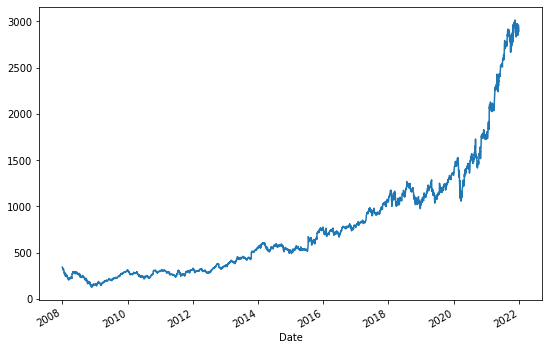

In [6]:
d.Close.plot(figsize=(9,6))

In [7]:
def dp(x):
    sns.distplot(d[x])

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


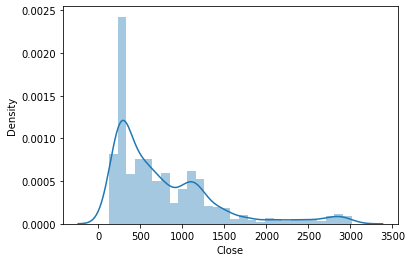

In [8]:
dp('Close')

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


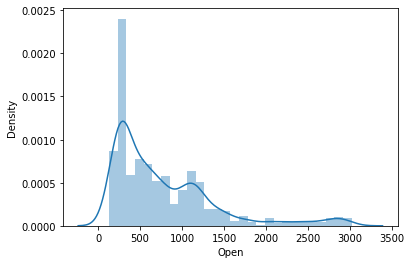

In [9]:
dp('Open')

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


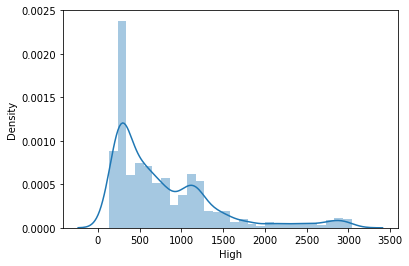

In [10]:
dp('High')

In [11]:
x = d.drop('Close',axis=1)
y = d['Close']

In [12]:
from sklearn.model_selection import train_test_split

a,d,s,f = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [13]:
print(a.shape)
print(s.shape)
print(d.shape)
print(f.shape)

(2821, 5)
(2821,)
(706, 5)
(706,)


## Models

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(a,s)
g = lr.predict(d)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def ms(f,g):
    mse = mean_squared_error(f,g)
    rmse = np.sqrt(mse)
    r2 = r2_score(f,g)
    
    print('mse : {}'.format(mse))
    print('rmse : {}'.format(rmse))
    print('r2_score : {}'.format(r2))

In [16]:
ms(f,g)

mse : 2.2160646009428575e-23
rmse : 4.707509533652436e-12
r2_score : 1.0


### Lasso and Ridge Regression

In [19]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(a,s)
ri = Ridge().fit(a,s)

lg = la.predict(d)
rg = ri.predict(d)

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+05, tolerance: 1.095e+05
  model = cd_fast.enet_coordinate_descent(


In [20]:
ms(f,lg)

mse : 98.16953100997168
rmse : 9.908053845734372
r2_score : 0.9997660448189362


In [21]:
ms(f,rg)

mse : 3.337135188919254e-09
rmse : 5.776794257128476e-05
r2_score : 0.999999999999992


### Support Vector Machine

In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
pg = {'C':[0.1,1,10,100,1000],
     'gamma':[1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']}

gs = GridSearchCV(SVR(), pg, refit = True, verbose = 3)
gs.fit(a,s)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.126 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.090 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.127 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.113 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.116 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.126 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.090 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.127 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.113 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.116 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.126 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
svr= SVR(C=10, gamma = 0.01, kernel = 'rbf')
svr.fit(a,s)
sg = svr.predict(d)

In [25]:
ms(f,sg)

mse : 461588.2648091682
rmse : 679.4028737127686
r2_score : -0.10004565530006304


In [31]:
import joblib

joblib.dump(ri,'model.pkl')
rfj = m = joblib.load('model.pkl')